In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Read the data
df = pd.read_csv('chatgpt_reviews.csv')

print("DATASET EXPLORATORY DATA ANALYSIS")
print("=" * 60)

DATASET EXPLORATORY DATA ANALYSIS


In [3]:
# 1. BASIC DATASET Inspection 
df.info()
print("DATASET EXPLORATORY DATA ANALYSIS")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              20000 non-null  object 
 1   userName              20000 non-null  object 
 2   userImage             20000 non-null  object 
 3   content               20000 non-null  object 
 4   score                 20000 non-null  int64  
 5   thumbsUpCount         20000 non-null  int64  
 6   reviewCreatedVersion  18550 non-null  object 
 7   at                    20000 non-null  object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
 10  appVersion            18550 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1.7+ MB
DATASET EXPLORATORY DATA ANALYSIS


In [4]:
df.dtypes

reviewId                 object
userName                 object
userImage                object
content                  object
score                     int64
thumbsUpCount             int64
reviewCreatedVersion     object
at                       object
replyContent            float64
repliedAt               float64
appVersion               object
dtype: object

reviewId: 评论ID，对象类型（字符串）每条评论的唯一ID，用于去重和关联分析 PK

userName: 对象类型（字符串）

userImage: 头像URL，在EDA中通常不重要

content: 评论内容，对象类型（字符串）# 重要！文本分析的主要字段

score: 评分，整型 # 关键指标！1.0-5.0 ratio .5 情感分析、满意度分析

thumbsUpCount: 点赞数，整型,衡量评论有用性的指标

‘unknown’ reviewCreatedVersion: 撰写评论时的应用版本，对象类型（字符串）， 版本更新对评分的影响分析

at: 评论时间，对象类型（字符串，可能是时间字符串）# 重要！需要转换为datetime类型, 时间趋势分析、季节性分析

删除replyContent: 回复内容，对象类型（字符串），

删除repliedAt: 回复时间，对象类型（字符串），

‘unknown’ appVersion: 应用版本，对象类型（字符串）， 可能与reviewCreatedVersion重复或相关


In [5]:
df.head(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,92c0fdef-4994-4d50-bd76-e5d35d12bf94,Angela Dagale,https://play-lh.googleusercontent.com/a/ACg8oc...,this app is great and good if you send a quest...,5,0,1.2025.252,2025-09-13 18:31:59,NaN,NaN,1.2025.252
1,b29c9edb-634a-4acf-8c42-8d746d1cb68f,Zakki Hussain,https://play-lh.googleusercontent.com/a-/ALV-U...,goated,5,0,1.2025.245,2025-09-13 18:31:12,NaN,NaN,1.2025.245
2,16a57a09-d61d-4078-92d4-fd1c1dacaac4,Rohan Faruquee,https://play-lh.googleusercontent.com/a/ACg8oc...,The replies are just to satisfy users rather t...,1,0,1.2025.217,2025-09-13 18:30:56,NaN,NaN,1.2025.217
3,297f450c-f5b7-43fe-8211-0c3f6bd1efe0,Salwa Abdoalrhem,https://play-lh.googleusercontent.com/a/ACg8oc...,صراحه يعجب اي بنت,5,0,1.2025.245,2025-09-13 18:30:09,NaN,NaN,1.2025.245
4,fa78d5d0-c8de-47e6-acf6-ecd832e63401,KALAI ARUN,https://play-lh.googleusercontent.com/a/ACg8oc...,very useful,4,0,1.2025.245,2025-09-13 18:30:06,NaN,NaN,1.2025.245
5,a8a74ed4-9c04-4464-9744-6de5ca45dfad,Sanjoy Rout,https://play-lh.googleusercontent.com/a/ACg8oc...,not open it,1,0,NaN,2025-09-13 18:29:54,NaN,NaN,NaN
6,6a55fe2e-d17b-403d-b596-ca25c1277e35,Roronoa Zoro,https://play-lh.googleusercontent.com/a/ACg8oc...,It won't say the n word 💔😔,1,0,1.2025.245,2025-09-13 18:29:28,NaN,NaN,1.2025.245
7,f1ad34ef-5814-4e8c-bc04-bf04a5d222e6,otieno ronny,https://play-lh.googleusercontent.com/a-/ALV-U...,the best so far,5,0,1.2025.238,2025-09-13 18:28:27,NaN,NaN,1.2025.238
8,e1c2c550-1872-4e49-8dee-3ac6651595f2,Muneer fatima,https://play-lh.googleusercontent.com/a/ACg8oc...,So Good,5,0,1.2025.245,2025-09-13 18:27:44,NaN,NaN,1.2025.245
9,b49ffc41-8672-4e68-9f18-6e16851fd8c3,mdshorif Hossen,https://play-lh.googleusercontent.com/a/ACg8oc...,good,5,0,1.2025.245,2025-09-13 18:27:37,NaN,NaN,1.2025.245


## Missing Value 

In [6]:
# Check all userName 
print("=== userName UNIQUENESS CHECK ===")

# Check if all are "A Google user"
all_same = (df['userName'] == "A Google user").all()
print(f"All user names are 'A Google user': {all_same}")

# If not all are the same, show the distribution
if not all_same:
    user_distribution = df['userName'].value_counts()
    print(f"\nTop 10 most common user names:")
    for user, count in user_distribution.head(10).items():
        print(f"  {user}: {count:,} reviews ({count/len(df)*100:.2f}%)")
    
    # Check what percentage are "A Google user"
    google_user_count = (df['userName'] == "A Google user").sum()
    print(f"\n'A Google user' count: {google_user_count:,} ({google_user_count/len(df)*100:.2f}%)")
else:
    print("All users are anonymized as 'A Google user'")

=== userName UNIQUENESS CHECK ===
All user names are 'A Google user': False

Top 10 most common user names:
  A Google user: 9 reviews (0.04%)
  Ravi Kumar: 8 reviews (0.04%)
  Manish Kumar: 8 reviews (0.04%)
  Amit Kumar: 7 reviews (0.03%)
  Vivek Kumar: 6 reviews (0.03%)
  Nitish Kumar: 6 reviews (0.03%)
  Aditya Kumar: 6 reviews (0.03%)
  Mehedi Hasan: 6 reviews (0.03%)
  Abhishek Kumar: 6 reviews (0.03%)
  Raj Kumar: 6 reviews (0.03%)

'A Google user' count: 9 (0.04%)


多个用户多次评论的情况（例如Ravi Kumar有8条评论）
1.统计每个用户的评论数量分布

2.检查是否有水军（某个用户大量评论）

3.用户评分的一致性（同一个用户是否总是给相似评分）

但是数据集中只有20,000条记录，而用户数量很多（从Top10来看，最多一个用户也只有8条评论），因此用户行为分析的价值有限。

综上所述，
保留userName，以便进行基本的用户行为分析（如每个用户的评论数）

In [7]:
df = df.drop(['userImage'], axis=1)

content: 由于缺失很少，直接删除缺失行。
reviewCreatedVersion和appVersion: 缺失比例相同，可能是同一批数据。我们可以考虑用特定值（如"unknown"）填充，或者单独标记为缺失。由于是版本信息，我们也可以考虑删除这两列，但通常版本信息对于分析版本相关的评分变化很重要。
replyContent和repliedAt: 缺失率极高,从情感分析的角度来看，我们主要关注用户评论的内容（content）和评分（score）。回复内容（replyContent）和回复时间（repliedAt）通常不是情感分析的重点，因为：回复内容是开发者的回应，不是用户原始情感的表达。回复时间可能用于分析开发者回复对用户情感的影响，但这不是直接的情感分析。因此，对于情感分析任务，replyContent和repliedAt列并不重要，删除简化数据集。

In [8]:
df = df.drop(['replyContent', 'repliedAt'], axis=1)

In [9]:
# 填充版本信息缺失值
df['reviewCreatedVersion'] = df['reviewCreatedVersion'].fillna('unknown')
df['appVersion'] = df['appVersion'].fillna('unknown')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              20000 non-null  object
 1   userName              20000 non-null  object
 2   content               20000 non-null  object
 3   score                 20000 non-null  int64 
 4   thumbsUpCount         20000 non-null  int64 
 5   reviewCreatedVersion  20000 non-null  object
 6   at                    20000 non-null  object
 7   appVersion            20000 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.2+ MB


# 数据可视化分析

In [11]:
print("=== 评分分布深入分析 Score analysis===")

# 评分分布统计
score_stats = df['score'].describe()
print("评分统计描述score stats:")
print(score_stats)


=== 评分分布深入分析 Score analysis===
评分统计描述score stats:
count    20000.000000
mean         4.432450
std          1.189919
min          1.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: score, dtype: float64


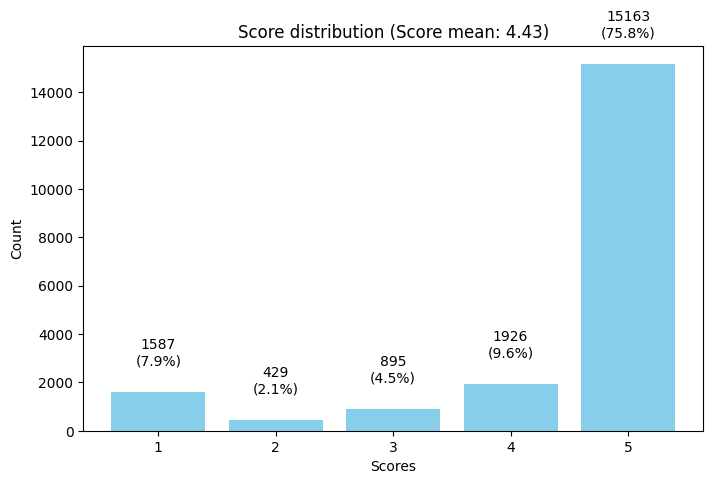

In [12]:
# 评分分布图
score_counts = df['score'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
bars = plt.bar(score_counts.index, score_counts.values, color='skyblue')

# 在柱子上方添加统计结果
for i, (score, count) in enumerate(score_counts.items()):
    percent = count / len(df) * 100
    plt.text(score, count + 1000, f'{count}\n({percent:.1f}%)', 
             ha='center', va='bottom', fontsize=10)

plt.title(f'Score distribution (Score mean: {df["score"].mean():.2f})')
plt.xlabel('Scores')
plt.ylabel('Count')
plt.xticks([1, 2, 3, 4, 5])
plt.show()

In [13]:
# Score深入分析
print("======Distribution Analysis======")
score_counts = df['score'].value_counts().sort_index()
print("Score Distribution:")
for score, count in score_counts.items():
    percent = count / len(df) * 100
    print(f"  {score}Score: {count} ({percent:.1f}%)")

# 判断分布偏向
mean_score = df['score'].mean()
if mean_score > 3:
    print(f"Distribution bias: high scores (mean score {mean_score:.2f} > 3)")
elif mean_score < 3:
    print(f"Distribution bias: low scores (mean score {mean_score:.2f} < 3)")
else:
    print("Evenly Distributed")

======Distribution Analysis======
Score Distribution:
  1Score: 1587 (7.9%)
  2Score: 429 (2.1%)
  3Score: 895 (4.5%)
  4Score: 1926 (9.6%)
  5Score: 15163 (75.8%)
Distribution bias: high scores (mean score 4.43 > 3)


### Scores数据的用途:
基于监督学习：使用评分作为标签（例如，1-2分为负面，3分为中性，4-5分为正面）来训练模型。评分分布的偏差（bias）会导致高分过拟合，低分的预测性能较差导致对负面评论的识别能力下降. 但在实际应用中，我们可能更关心负面评论，因为需要及时处理用户投诉和改进产品。因此首当其冲的是平衡数据集或采用更适合不平衡数据的模型评估指标（如F1-score，AUC等）。
基于无监督学习：例如使用情感词典
### Scores数据的分析:

In [14]:
# Scores与其他变量的关系
print("Relationship between scores and other variables:")

Relationship between scores and other variables:


''

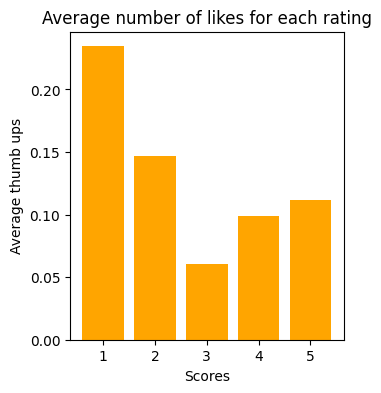

In [15]:
plt.figure(figsize=(12, 4))

# 评分与点赞数的关系
plt.subplot(1, 3, 1)
score_thumbs = df.groupby('score')['thumbsUpCount'].mean()
plt.bar(score_thumbs.index, score_thumbs.values, color='orange')
plt.title('Average number of likes for each rating')
plt.xlabel('Scores')
plt.ylabel('Average thumb ups')
;

''

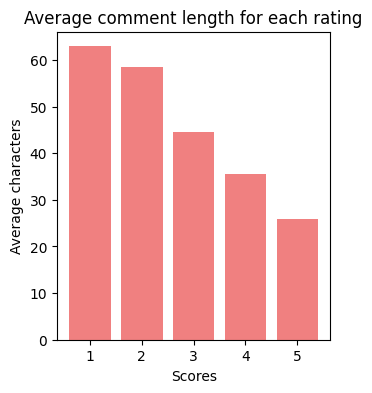

In [16]:
# Create content_length column first
df['content_length'] = df['content'].str.len()
# 评分与评论长度的关系
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 2)
score_length = df.groupby('score')['content_length'].mean()
plt.bar(score_length.index, score_length.values, color='lightcoral')
plt.title('Average comment length for each rating')
plt.xlabel('Scores')
plt.ylabel('Average characters')
;

图上可以看出,打了高分的用户,评价字数相对比打低分的用户评价字数多很多.

In [17]:
# 评分随时间的变化趋势 - 小时,月度、季度、年度分析
print("=== 评分随时间变化趋势分析 ===")
# 首先确保 at 列是 datetime 类型
print("at data type:", df['at'].dtype)
# 如果不是 datetime，需要转换
if not pd.api.types.is_datetime64_any_dtype(df['at']):
    df['at'] = pd.to_datetime(df['at'])
    print("已转换 at 列为 datetime 类型")
# 使用 dt 访问器
print("转换后的数据类型:", df['at'].dtype)

=== 评分随时间变化趋势分析 ===
at data type: object
已转换 at 列为 datetime 类型
转换后的数据类型: datetime64[ns]


In [18]:
# 检查时间字段格式和实际范围
print("时间字段 'at' 的数据类型:")
print(df['at'].dtype)

print("\n数据实际覆盖的时间范围:")
print("开始时间:", df['at'].min())
print("结束时间:", df['at'].max())

# 计算实际的年份和月份分布
df['year'] = df['at'].dt.year
df['month'] = df['at'].dt.month
df['year_month'] = df['at'].dt.to_period('M')

print("\n包含的年份:", sorted(df['year'].unique()))
print("总月份数量:", df['year_month'].nunique())

# 显示各月份的记录数
monthly_counts = df['year_month'].value_counts().sort_index()
print("\n各月份数据分布:")
print(monthly_counts)

时间字段 'at' 的数据类型:
datetime64[ns]

数据实际覆盖的时间范围:
开始时间: 2025-09-09 23:09:35
结束时间: 2025-09-13 18:31:59

包含的年份: [np.int32(2025)]
总月份数量: 1

各月份数据分布:
year_month
2025-09    20000
Freq: M, Name: count, dtype: int64


===日内评分模式===


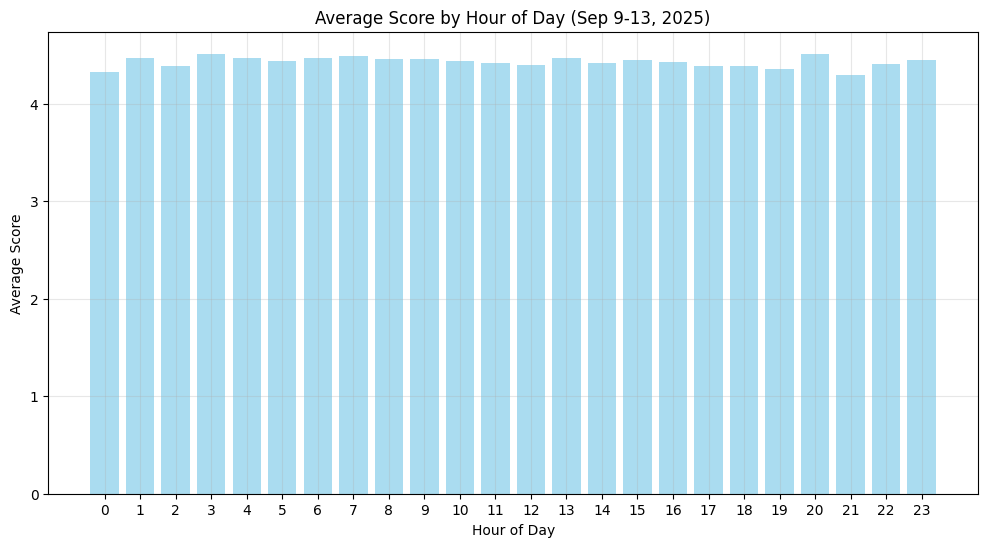

高峰时段分析:
最高平均分时段: 20:00 (Score: 4.51)


In [19]:
print("===日内评分模式===")

# 提取小时信息
df['hour'] = df['at'].dt.hour

# 按小时分析评分
hourly_avg = df.groupby('hour')['score'].mean()

plt.figure(figsize=(12, 6))
plt.bar(hourly_avg.index, hourly_avg.values, color='skyblue', alpha=0.7)
plt.title('Average Score by Hour of Day (Sep 9-13, 2025)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Score')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.show()

print("高峰时段分析:")
peak_hour = hourly_avg.idxmax()
print(f"最高平均分时段: {peak_hour}:00 (Score: {hourly_avg.max():.2f})")

由于这段截取的数据时间范围有限,这部分可视化没有很直观的意义,但重新抓取时间范围扩大后或许会提供有研究价值.Since the time range of the captured data is limited, this part of the visualization does not have much viewing value, but it may provide research value if the time range is expanded.

找到 24 个有足够样本量的版本


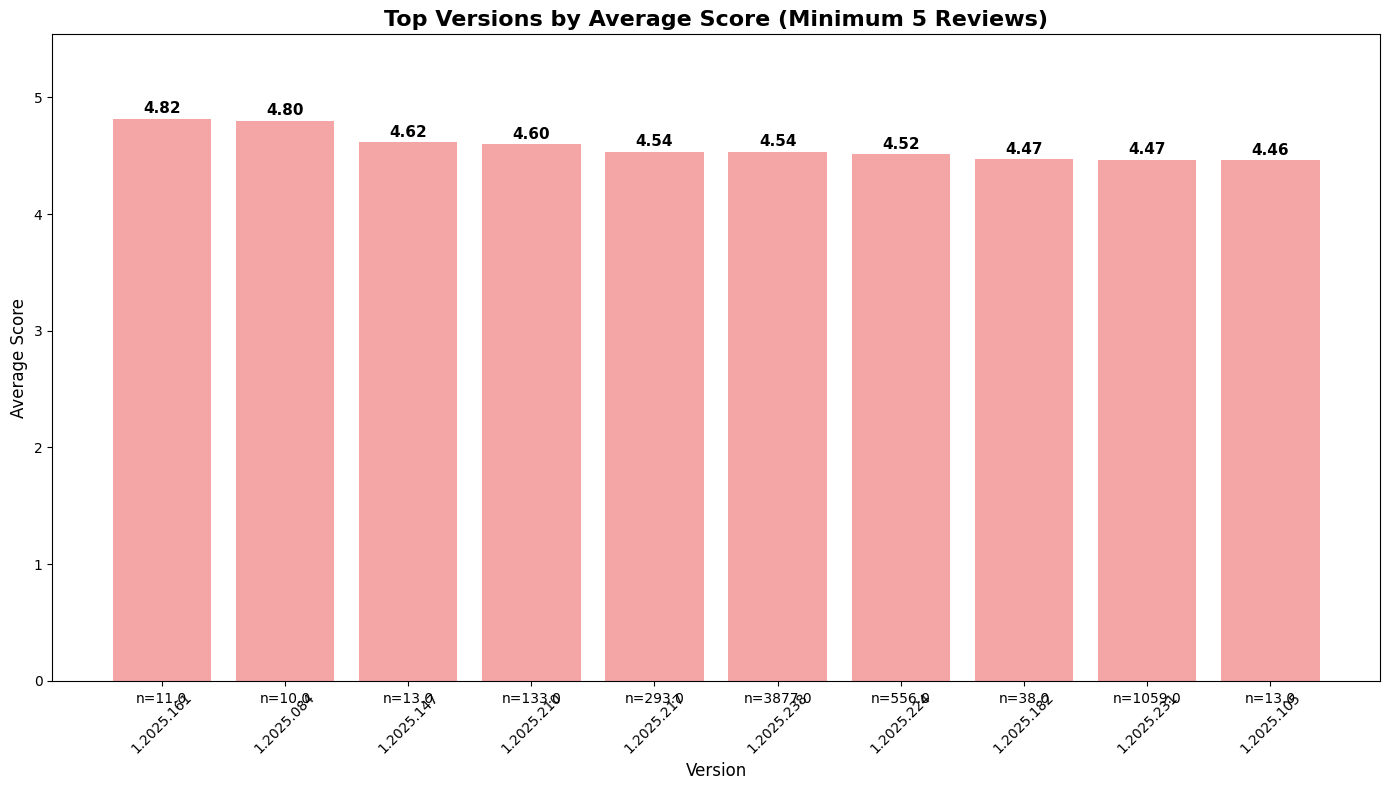

可靠版本评分排名 (至少5条评论):
1. 1.2025.161: 4.82 (基于11.0条评论)
2. 1.2025.084: 4.80 (基于10.0条评论)
3. 1.2025.147: 4.62 (基于13.0条评论)
4. 1.2025.210: 4.60 (基于133.0条评论)
5. 1.2025.217: 4.54 (基于293.0条评论)
6. 1.2025.238: 4.54 (基于3877.0条评论)
7. 1.2025.224: 4.52 (基于556.0条评论)
8. 1.2025.182: 4.47 (基于38.0条评论)
9. 1.2025.231: 4.47 (基于1059.0条评论)
10. 1.2025.105: 4.46 (基于13.0条评论)


In [29]:
# 分析不同版本的评分和样本量
version_stats = df.groupby('reviewCreatedVersion').agg({
    'score': 'mean',
    'reviewId': 'count'
}).rename(columns={'reviewId': 'count'})

# 按评分和样本量综合排序 (优先考虑样本量大的版本)
version_stats['weighted_rank'] = version_stats['score'] * np.log1p(version_stats['count'])

# 选择至少有5条评论的版本进行可靠分析
reliable_versions = version_stats[version_stats['count'] >= 5].sort_values('score', ascending=False)

if len(reliable_versions) > 0:
    print(f"找到 {len(reliable_versions)} 个有足够样本量的版本")
    
    plt.figure(figsize=(14, 8))
    bars = plt.bar(range(len(reliable_versions.head(10))), 
                   reliable_versions.head(10)['score'].values, 
                   color='lightcoral', alpha=0.7)

    plt.title('Top Versions by Average Score (Minimum 5 Reviews)', fontsize=16, fontweight='bold')
    plt.xlabel('Version', fontsize=12)
    plt.ylabel('Average Score', fontsize=12)
    plt.xticks(range(len(reliable_versions.head(10))), 
               reliable_versions.head(10).index, rotation=45)

    # 在每个柱子上方添加分数和样本量
    for i, (idx, row) in enumerate(reliable_versions.head(10).iterrows()):
        height = row['score']
        count = row['count']
        plt.text(i, height + 0.02, f'{height:.2f}', 
                ha='center', va='bottom', fontsize=11, fontweight='bold')
        plt.text(i, -0.1, f'n={count}', 
                ha='center', va='top', fontsize=10)

    plt.ylim(0, max(reliable_versions.head(10)['score'].values) * 1.15)
    plt.tight_layout()
    plt.show()

    print("可靠版本评分排名 (至少5条评论):")
    for i, (version, row) in enumerate(reliable_versions.head(10).iterrows(), 1):
        print(f"{i}. {version}: {row['score']:.2f} (基于{row['count']}条评论)")
else:
    print("没有找到拥有足够样本量(≥5条评论)的版本")
    
    # 显示所有版本，但标注样本量警告
    print("\n所有版本评分 (注意: 样本量均很小):")
    for i, (version, row) in enumerate(version_stats.sort_values('score', ascending=False).head(15).iterrows(), 1):
        reliability_note = " ⚠️ 样本量小" if row['count'] < 5 else ""
        print(f"{i}. {version}: {row['score']:.2f} (基于{row['count']}条评论){reliability_note}")

=== version distribution ===
version distribution:
total version count: 54
average reviews for each version : 370.4
median reviews for each version: 3.0
mostly reviewed version: 1.2025.245 (12069reviews)


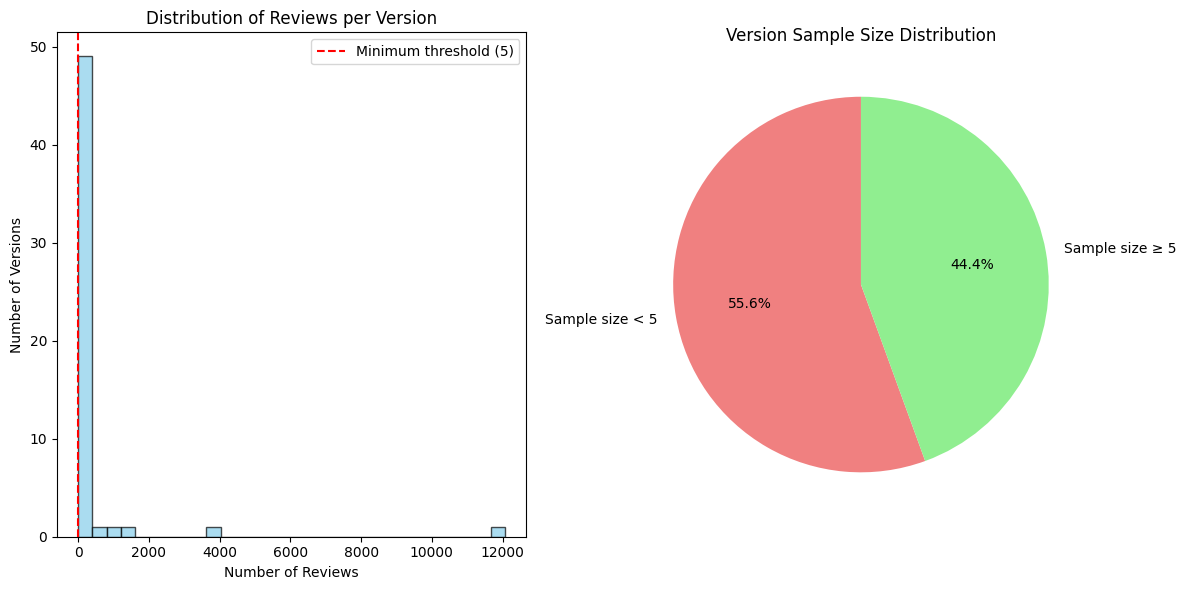

样本量分析:
- Sample size is not big enough (<5reviews): 30 (55.6%)
- ample size is big enough(≥5reviews): 24 (44.4%)


In [22]:
# 额外分析：样本量分布情况
print("=== version distribution ===")

version_counts = version_stats['count']
print("version distribution:")
print(f"total version count: {len(version_counts)}")
print(f"average reviews for each version : {version_counts.mean():.1f}")
print(f"median reviews for each version: {version_counts.median():.1f}")
print(f"mostly reviewed version: {version_counts.idxmax()} ({version_counts.max()}reviews)")

# 样本量分布可视化
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
# 样本量分布直方图
plt.hist(version_counts, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Reviews per Version')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Versions')
plt.axvline(5, color='red', linestyle='--', label='Minimum threshold (5)')
plt.legend()

plt.subplot(1, 2, 2)
# 样本量分类统计
small_samples = len(version_counts[version_counts < 5])
adequate_samples = len(version_counts[version_counts >= 5])
labels = ['Sample size < 5', 'Sample size ≥ 5']
sizes = [small_samples, adequate_samples]
colors = ['lightcoral', 'lightgreen']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Version Sample Size Distribution')

plt.tight_layout()
plt.show()

print(f"样本量分析:")
print(f"- Sample size is not big enough (<5reviews): {small_samples} ({small_samples/len(version_counts)*100:.1f}%)")
print(f"- ample size is big enough(≥5reviews): {adequate_samples} ({adequate_samples/len(version_counts)*100:.1f}%)")

=== 版本评分综合分析 ===


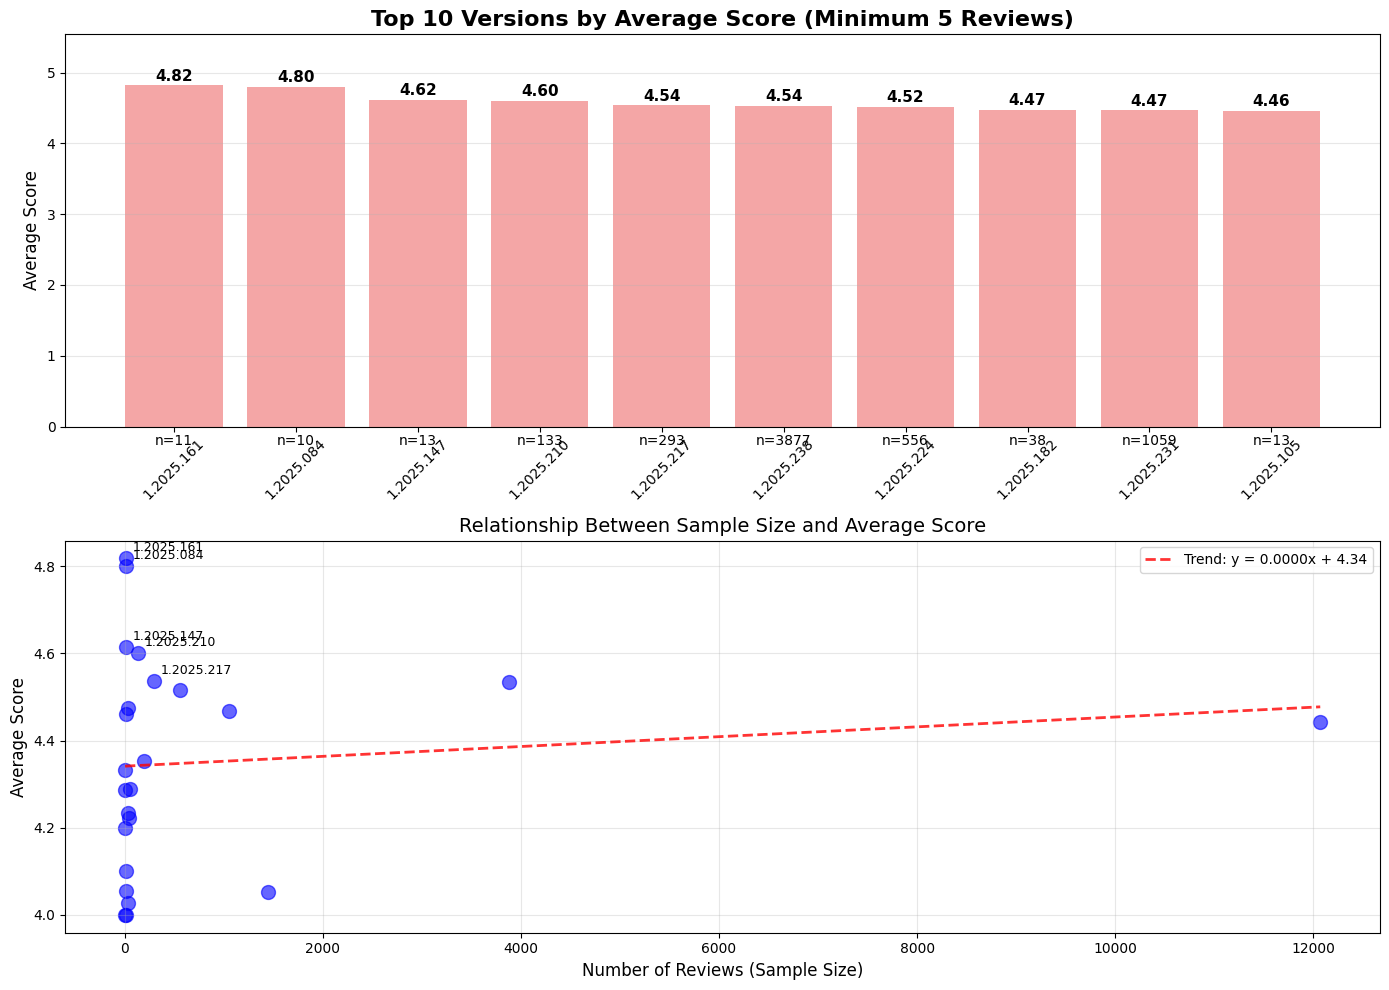


详细版本统计:
总可靠版本数: 24
所有可靠版本平均分: 4.35
所有可靠版本中位数分: 4.34
评分标准差: 0.24
评分范围: 4.00 - 4.82

样本量分析:
平均每个版本评论数: 831.4
中位数评论数: 34.0
最大样本量: 12069 (版本: 1.2025.245)
最小样本量: 5

样本量与评分的相关性: 0.118
→ 样本量与评分之间没有明显相关关系


In [30]:

print("=== 版本评分综合分析 ===")

# 继续分析可靠版本
plt.figure(figsize=(14, 10))

# 子图1: 评分排名
plt.subplot(2, 1, 1)
top_versions = reliable_versions.head(10)
bars = plt.bar(range(len(top_versions)), top_versions['score'].values, 
               color='lightcoral', alpha=0.7)

plt.title('Top 10 Versions by Average Score (Minimum 5 Reviews)', fontsize=16, fontweight='bold')
plt.ylabel('Average Score', fontsize=12)
plt.xticks(range(len(top_versions)), top_versions.index, rotation=45)

# 在每个柱子上方添加分数和样本量
for i, (idx, row) in enumerate(top_versions.iterrows()):
    height = row['score']
    count = int(row['count'])  # 转换为整数
    plt.text(i, height + 0.02, f'{height:.2f}', 
            ha='center', va='bottom', fontsize=11, fontweight='bold')
    plt.text(i, -0.1, f'n={count}', 
            ha='center', va='top', fontsize=10)

plt.ylim(0, max(top_versions['score'].values) * 1.15)
plt.grid(axis='y', alpha=0.3)

# 子图2: 样本量与评分的关系
plt.subplot(2, 1, 2)
plt.scatter(reliable_versions['count'], reliable_versions['score'], 
           s=100, alpha=0.6, color='blue')
plt.title('Relationship Between Sample Size and Average Score', fontsize=14)
plt.xlabel('Number of Reviews (Sample Size)', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.grid(True, alpha=0.3)

# 添加趋势线
if len(reliable_versions) > 1:
    z = np.polyfit(reliable_versions['count'], reliable_versions['score'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(reliable_versions['count'].min(), reliable_versions['count'].max(), 100)
    plt.plot(x_line, p(x_line), "r--", alpha=0.8, linewidth=2, 
             label=f'Trend: y = {z[0]:.4f}x + {z[1]:.2f}')
    plt.legend()

# 标注几个关键点
for i, (version, row) in enumerate(reliable_versions.head(5).iterrows()):
    plt.annotate(version, (row['count'], row['score']),
                textcoords="offset points", xytext=(5,5), 
                ha='left', fontsize=9)

plt.tight_layout()
plt.show()

# 详细统计信息
print("\n详细版本统计:")
print(f"总可靠版本数: {len(reliable_versions)}")
print(f"所有可靠版本平均分: {reliable_versions['score'].mean():.2f}")
print(f"所有可靠版本中位数分: {reliable_versions['score'].median():.2f}")
print(f"评分标准差: {reliable_versions['score'].std():.2f}")
print(f"评分范围: {reliable_versions['score'].min():.2f} - {reliable_versions['score'].max():.2f}")

# 样本量分析
print(f"\n样本量分析:")
print(f"平均每个版本评论数: {reliable_versions['count'].mean():.1f}")
print(f"中位数评论数: {reliable_versions['count'].median():.1f}")
print(f"最大样本量: {reliable_versions['count'].max():.0f} (版本: {reliable_versions['count'].idxmax()})")
print(f"最小样本量: {reliable_versions['count'].min():.0f}")

# 版本评分与样本量的相关性
correlation = reliable_versions['count'].corr(reliable_versions['score'])
print(f"\n样本量与评分的相关性: {correlation:.3f}")
if abs(correlation) > 0.3:
    direction = "正相关" if correlation > 0 else "负相关"
    print(f"→ 存在{abs(correlation):.1%}的{direction}关系")
else:
    print("→ 样本量与评分之间没有明显相关关系")


=== 版本演进趋势分析 ===


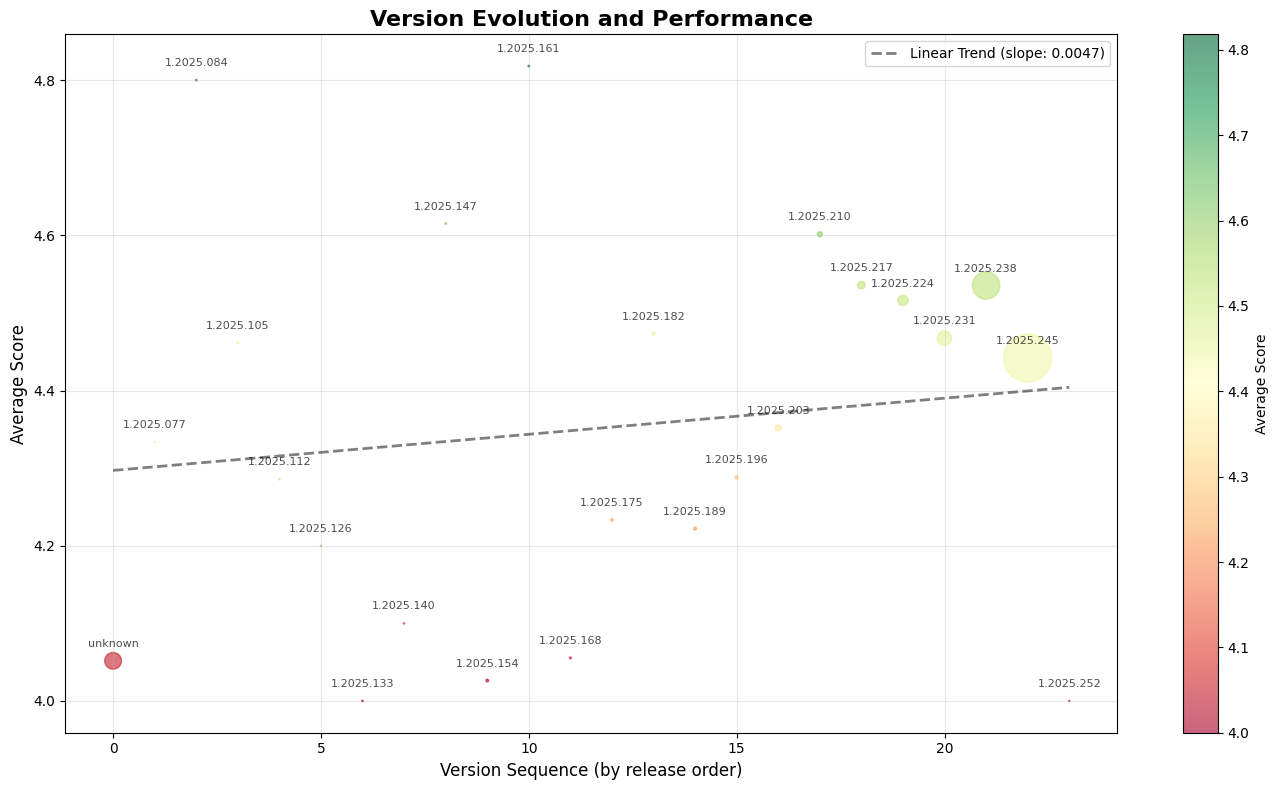

版本演进趋势:
从 unknown 到 1.2025.252
评分趋势: 改善 (斜率: 0.0047)
最早版本平均分: 4.05
最新版本平均分: 4.00
变化: -0.05


In [24]:
# 版本演进趋势分析
print("\n=== 版本演进趋势分析 ===")

# 提取版本号中的数字部分用于排序
def extract_version_numbers(version_str):
    """从版本字符串中提取数字部分"""
    if version_str == 'unknown':
        return (0, 0, 0)
    parts = version_str.split('.')
    try:
        # 假设格式为 "1.2025.161"
        return tuple(int(part) for part in parts if part.isdigit())
    except:
        return (0, 0, 0)

# 为可靠版本添加排序键
reliable_versions['version_key'] = reliable_versions.index.map(extract_version_numbers)
reliable_versions_sorted = reliable_versions.sort_values('version_key')

# 绘制版本演进趋势
plt.figure(figsize=(14, 8))

# 使用气泡图显示版本演进
plt.scatter(range(len(reliable_versions_sorted)), 
           reliable_versions_sorted['score'],
           s=reliable_versions_sorted['count']/10,  # 气泡大小与样本量成正比
           alpha=0.6, 
           c=reliable_versions_sorted['score'],
           cmap='RdYlGn')

plt.colorbar(label='Average Score')
plt.title('Version Evolution and Performance', fontsize=16, fontweight='bold')
plt.xlabel('Version Sequence (by release order)', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.grid(True, alpha=0.3)

# 添加版本标签
for i, (version, row) in enumerate(reliable_versions_sorted.iterrows()):
    plt.annotate(version, (i, row['score']),
                textcoords="offset points", xytext=(0,10), 
                ha='center', fontsize=8, alpha=0.7)

# 添加趋势线
if len(reliable_versions_sorted) > 1:
    x = range(len(reliable_versions_sorted))
    y = reliable_versions_sorted['score'].values
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), "k--", alpha=0.5, linewidth=2, 
             label=f'Linear Trend (slope: {z[0]:.4f})')
    plt.legend()

plt.tight_layout()
plt.show()

# 版本演进分析
print("版本演进趋势:")
if len(reliable_versions_sorted) > 1:
    first_version = reliable_versions_sorted.iloc[0]
    last_version = reliable_versions_sorted.iloc[-1]
    trend_direction = "改善" if z[0] > 0 else "下降"
    print(f"从 {reliable_versions_sorted.index[0]} 到 {reliable_versions_sorted.index[-1]}")
    print(f"评分趋势: {trend_direction} (斜率: {z[0]:.4f})")
    print(f"最早版本平均分: {first_version['score']:.2f}")
    print(f"最新版本平均分: {last_version['score']:.2f}")
    print(f"变化: {last_version['score'] - first_version['score']:+.2f}")

Relationship between version and rating:


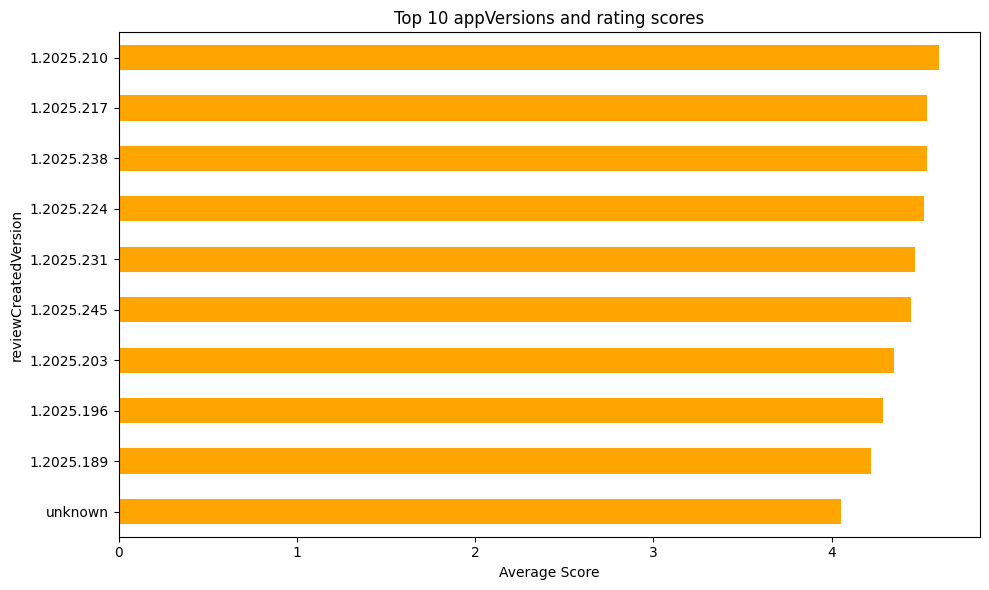

In [25]:
# Scores 和 appVersion的关系
print("Relationship between version and rating:")

# 前10个最常见版本的平均分
top_versions = df['reviewCreatedVersion'].value_counts().head(10).index
version_scores = df[df['reviewCreatedVersion'].isin(top_versions)].groupby('reviewCreatedVersion')['score'].mean()

plt.figure(figsize=(10, 6))
version_scores.sort_values().plot(kind='barh', color='orange')
plt.title('Top 10 appVersions and rating scores')
plt.xlabel('Average Score')
plt.tight_layout()
plt.show()

In [33]:
# 极端评分分析
print("极端评分分析:")

# 1-2星差评分析
low_scores = df[df['score'] <= 2]
print(f"差评(1-2星)数量: {len(low_scores)}")
print(f"差评占比: {len(low_scores)/len(df)*100:.1f}%")

# 5星好评分析
high_scores = df[df['score'] == 5]
print(f"好评(5星)数量: {len(high_scores)}")
print(f"好评占比: {len(high_scores)/len(df)*100:.1f}%")

# 计算净推荐值
nps_like = (len(high_scores) - len(low_scores)) / len(df) * 100
print(f"净推荐值: {nps_like:.1f}%")

# 评分一致性
score_consistency = df['score'].std()
print(f"评分一致性(标准差): {score_consistency:.2f} (值越小越一致)")

极端评分分析:
差评(1-2星)数量: 2016
差评占比: 10.1%
好评(5星)数量: 15163
好评占比: 75.8%
净推荐值: 65.7%
评分一致性(标准差): 1.19 (值越小越一致)
